In [ ]:
import numpy as np
import pandas as pd

from scipy.optimize import dual_annealing
from sklearn.model_selection import KFold
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as MSE
from sklearn.svm import SVR

In [ ]:
!pip install geneticalgorithm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 44 kB 2.3 MB/s 
  Created wheel for func-timeout: filename=func_timeout-4.3.5-py3-none-any.whl size=15098 sha256=39666f2dad976663ac289ec1fa842666c654421ad1577cddae2784bc8c91bc76
  Stored in directory: /root/.cache/pip/wheels/68/b5/a5/67c4364c354e141f5a1bd3ec568126f77877ab7554cf5af8cb
Successfully built func-timeout


In [ ]:
pip install pyswarms

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 104 kB 17.0 MB/s 


In [ ]:
from geneticalgorithm import geneticalgorithm as ga
import pyswarms as ps
from scipy.optimize import dual_annealing

In [ ]:
# Import modules
import matplotlib as mpl
mpl.rcParams['animation.embed_limit'] = 2**128
from IPython.display import Image
from IPython.display import HTML, display

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
mpl.rcParams['figure.dpi'] = 150
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('drive/MyDrive/DATA 310/Datasets/AirI.csv',header=None)

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,3.4482,0.001314,0.157470,0.688300,0.152920,0.000000,0.00000,0.096603,0.52135,0.382050,...,-2.94590,0.219960,-0.69045,0.240440,-0.258640,1.33870,0.114820,-0.43046,0.82309,1.543500
1,3.3019,0.188490,0.553190,0.258290,0.000031,0.000000,0.00000,0.039008,0.43211,0.527160,...,-0.22680,-0.428570,0.74992,-0.111920,1.583000,0.88565,-0.053227,0.67796,-1.72010,-0.550510
2,2.2894,0.052169,0.438520,0.494030,0.015282,0.000000,0.00000,0.000000,0.00000,0.394840,...,1.15790,0.010118,0.73593,1.356000,0.057821,-1.44140,1.581800,1.25420,1.02540,-1.018900
3,2.6207,0.000000,0.000000,0.004213,0.109340,0.493440,0.39300,0.000000,0.00000,0.578540,...,-0.69767,1.577800,0.54899,-0.780420,1.136700,-0.84240,0.993120,-0.44576,-0.78778,-1.490900
4,2.8439,0.000000,0.000000,0.019504,0.260470,0.549860,0.17016,0.010568,0.30520,0.670460,...,-1.49170,-0.688640,-0.69924,0.360740,-0.685860,-0.76161,-0.354560,0.83093,-0.27100,0.388610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,2.4101,0.301000,0.021904,0.000415,0.000000,0.000000,0.00000,0.000000,0.00000,0.051206,...,-1.56660,-1.097100,2.77450,0.679850,-0.292200,0.13691,-0.439250,-1.56390,0.29082,0.023485
107,3.1072,0.000734,0.138890,0.688740,0.171630,0.000000,0.00000,0.171260,0.54746,0.280340,...,-0.32440,-1.341500,-1.51650,0.870840,1.023700,0.26581,0.174520,-0.29601,1.13600,0.217580
108,2.4101,0.001095,0.151180,0.688720,0.159000,0.000000,0.00000,0.000000,0.00000,0.194760,...,-0.49572,-0.832130,0.52386,0.189400,1.115700,-0.14259,-0.481300,-1.58790,-0.23976,1.717000
109,2.6207,0.117370,0.526200,0.354590,0.001831,0.000000,0.00000,0.039008,0.43211,0.527160,...,-0.87353,0.063740,0.20128,0.090828,0.338310,-1.23960,-1.197600,-0.35008,0.59517,0.803430


In [ ]:
Xf = df.values
X = Xf[:,1:]
y = Xf[:,0]

In [ ]:
print(X.shape)
print(y.shape)

(111, 511)
(111,)


##Genetic Algorithm


### Elastic Net

In [ ]:
def objective_ENet(h): # h is a two column matrix
  kf = KFold(n_splits=10,shuffle=True,random_state=123)
  scale = StandardScaler()
  output = [] 
  a = h[0]
  l = h[1]
  model = ElasticNet(alpha=a,l1_ratio=l,max_iter=5000)
  PE = []
  for idxtrain, idxtest in kf.split(X):
    Xtrain = X[idxtrain]
    ytrain = y[idxtrain]
    Xtrain_s = scale.fit_transform(Xtrain)
    Xtest = X[idxtest]
    ytest = y[idxtest]
    Xtest_s = scale.transform(Xtest)
    model.fit(Xtrain_s,ytrain)
    PE.append(MSE(ytest,model.predict(Xtest_s)))
  return np.mean(PE)

 The best solution found:
 [0.98704225 0.00508052]

 Objective function:
 0.2578499512538454


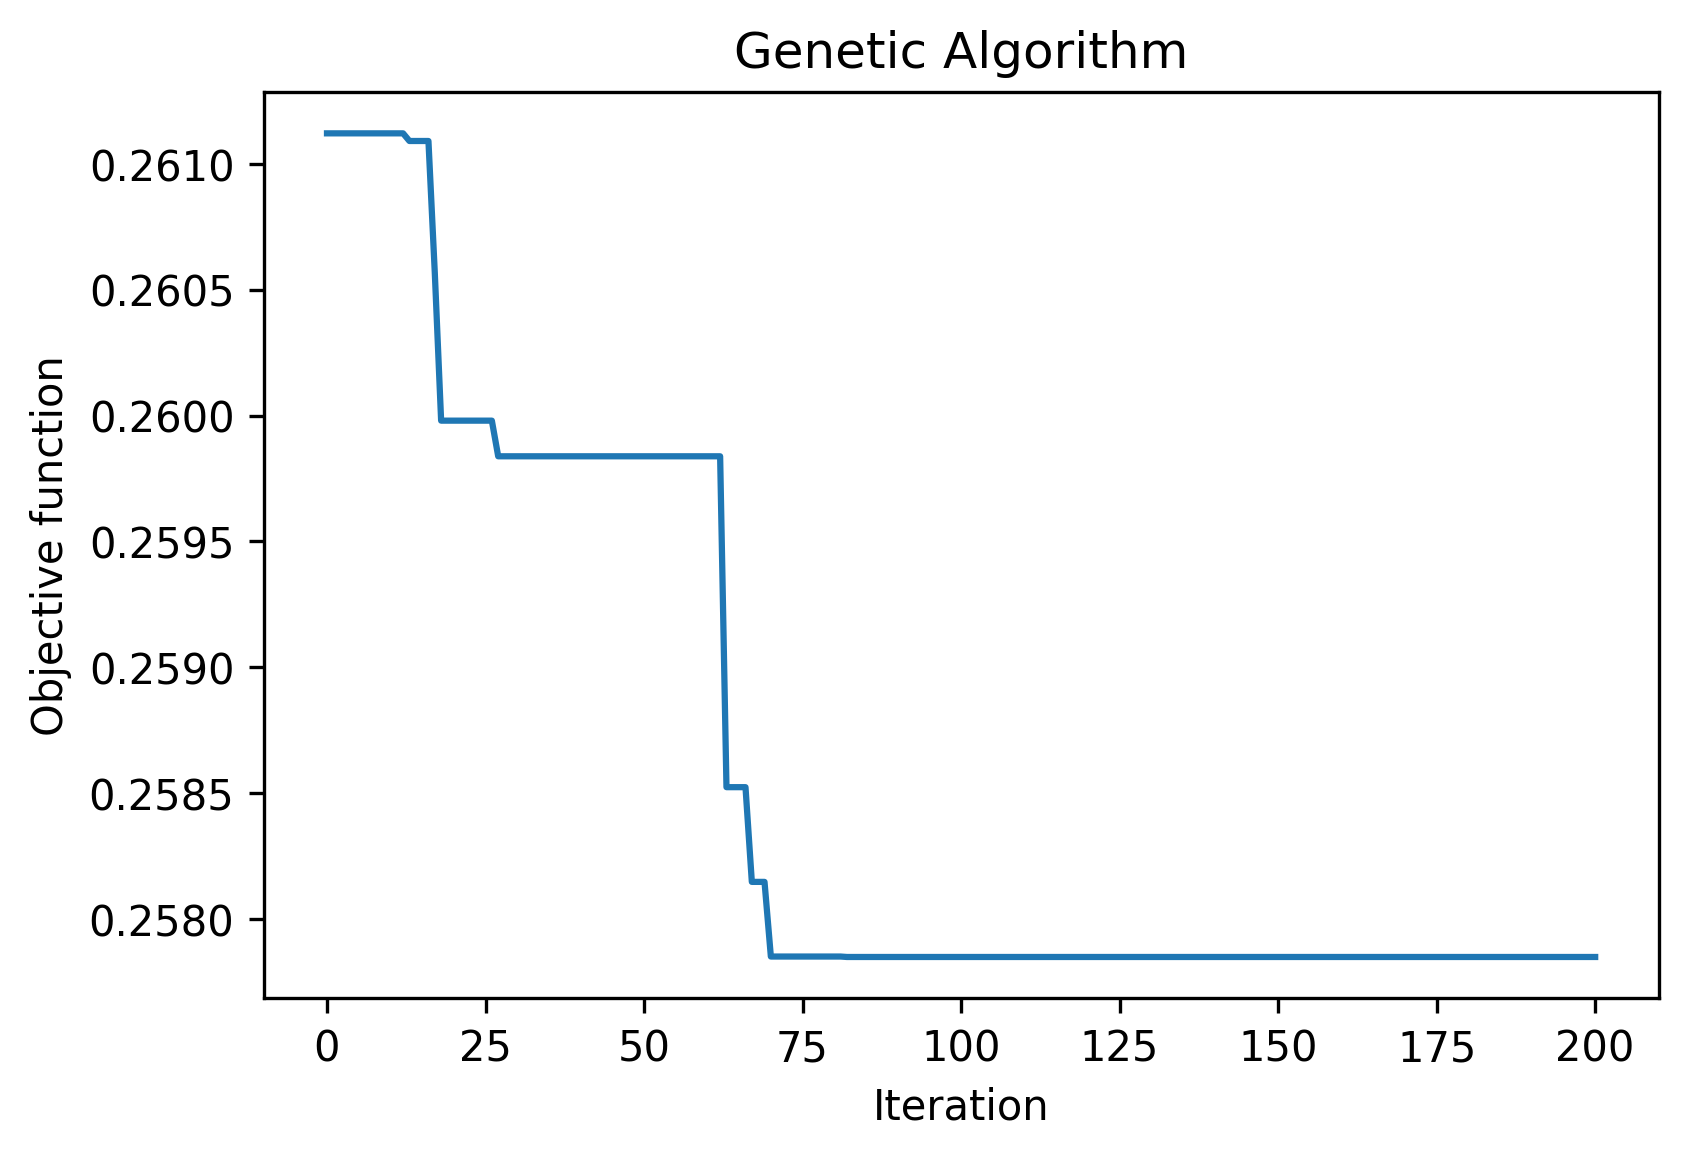

In [ ]:
varbound=np.array([[0,3],[0,1]])

model=ga(function=objective_ENet,dimension=2,variable_type='real',variable_boundaries=varbound)

model.run()

### Support Vector Regression

In [ ]:
def objective_SVR(h): # h is a two column matrix
  kf = KFold(n_splits=10,shuffle=True,random_state=123)
  scale = StandardScaler()
  output = [] 
  Reg_Param = h[0] # column matrix 
  e = h[1]
  model = SVR(C=Reg_Param,kernel = 'linear', epsilon=e,max_iter=5000)
  PE = []
  for idxtrain, idxtest in kf.split(X):
    Xtrain = X[idxtrain]
    ytrain = y[idxtrain]
    Xtrain_s = scale.fit_transform(Xtrain)
    Xtest = X[idxtest]
    ytest = y[idxtest]
    Xtest_s = scale.transform(Xtest)
    model.fit(Xtrain_s,ytrain)
    PE.append(MSE(ytest,model.predict(Xtest_s)))
  return np.mean(PE)

 The best solution found:
 [1.80854012 0.13022291]

 Objective function:
 0.2685879562033867


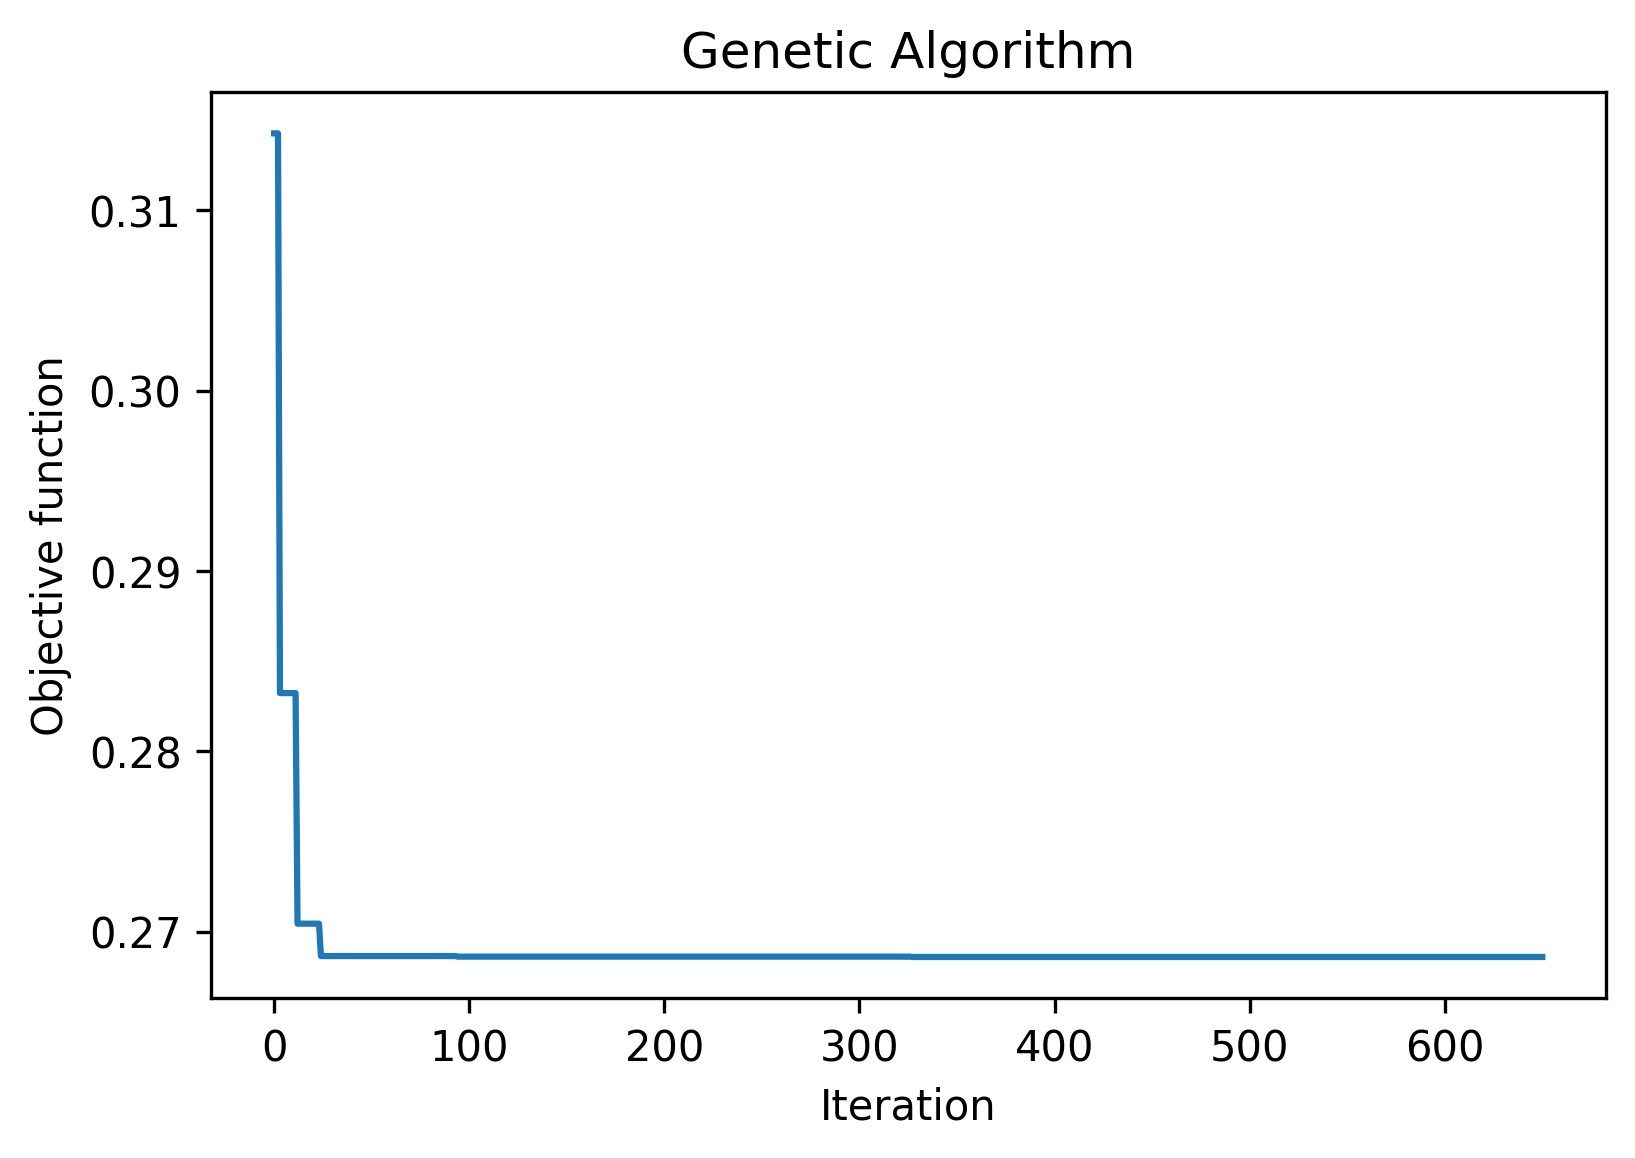

In [ ]:
varbound=np.array([[0,3],[0,10]])

model=ga(function=objective_SVR,dimension=2,variable_type='real',variable_boundaries=varbound)

model.run()

##Simulated Annealing

### ElasticNet

In [ ]:
def objective_ENet(h): # h is a two column matrix
  kf = KFold(n_splits=10,shuffle=True,random_state=123)
  scale = StandardScaler()
  output = [] 
  a = h[0] # column matrix 
  l = h[1]
  model = ElasticNet(alpha=a,l1_ratio=l,max_iter=5000)
  PE = []
  for idxtrain, idxtest in kf.split(X):
    Xtrain = X[idxtrain]
    ytrain = y[idxtrain]
    Xtrain_s = scale.fit_transform(Xtrain)
    Xtest = X[idxtest]
    ytest = y[idxtest]
    Xtest_s = scale.transform(Xtest)
    model.fit(Xtrain_s,ytrain)
    PE.append(MSE(ytest,model.predict(Xtest_s)))
  return np.mean(PE)

In [ ]:
lw = [0,0]
up = [3,1]
ret_ENet = dual_annealing(objective_ENet, bounds=list(zip(lw, up)),maxiter=10000,maxfun=10000)

In [ ]:
ret_ENet.x

array([1.00128008, 0.00486568])

In [ ]:
ret_ENet

     fun: 0.2578164718558199
 message: ['Maximum number of function call reached during dual annealing']
    nfev: 10149
    nhev: 0
     nit: 1302
    njev: 1645
  status: 0
 success: False
       x: array([1.00128008, 0.00486568])

### Support Vector Regression

In [ ]:
def objective_SVR(h): # h is a two column matrix
  kf = KFold(n_splits=10,shuffle=True,random_state=123)
  scale = StandardScaler()
  output = [] 
  Reg_Param = h[0] # column matrix 
  e = h[1]
  model = SVR(C=Reg_Param,kernel = 'linear', epsilon=e,max_iter=5000)
  PE = []
  for idxtrain, idxtest in kf.split(X):
    Xtrain = X[idxtrain]
    ytrain = y[idxtrain]
    Xtrain_s = scale.fit_transform(Xtrain)
    Xtest = X[idxtest]
    ytest = y[idxtest]
    Xtest_s = scale.transform(Xtest)
    model.fit(Xtrain_s,ytrain)
    PE.append(MSE(ytest,model.predict(Xtest_s)))
  return np.mean(PE)

In [ ]:
lw = [0.000001,0]
up = [10,10]
ret_SVR = dual_annealing(objective_SVR, bounds=list(zip(lw, up)),maxiter=10000,maxfun=10000)

In [ ]:
ret_SVR.x

array([3.14809625, 0.13078507])

In [ ]:
ret_SVR

     fun: 0.2685905755887619
 message: ['Maximum number of function call reached during dual annealing']
    nfev: 10118
    nhev: 0
     nit: 2186
    njev: 456
  status: 0
 success: False
       x: array([3.14809625, 0.13078507])

##Particle Swarm Optimization

### Elastic Net

In [ ]:
# This is the technical format if you want to apply PSO
def objective_pso_ENet(h): # h is a two column matrix
  kf = KFold(n_splits=10,shuffle=True,random_state=123)
  scale = StandardScaler()
  output = [] 
  for i in range(h.shape[0]):
    a = h[i,0] # column matrix 
    l = h[i,1]
    model = ElasticNet(alpha=a,l1_ratio=l,max_iter=5000)
    PE = []
    for idxtrain, idxtest in kf.split(X):
      Xtrain = X[idxtrain]
      ytrain = y[idxtrain]
      Xtest = X[idxtest]
      ytest = y[idxtest]

      Xtrain_s = scale.fit_transform(Xtrain)
      Xtest_s = scale.transform(Xtest)
      model.fit(Xtrain_s,ytrain)
      PE.append(MSE(ytest,model.predict(Xtest_s)))
    output.append(np.mean(PE))
  return output

In [ ]:
max = np.array([3,1])
min = np.array([0,0])
bounds = (min, max)
options = {'c1': 0.25, 'c2': 0.25, 'w': 0.5}
optimizer = ps.single.GlobalBestPSO(n_particles=25, dimensions=2, options=options, bounds=bounds)
cost, pos = optimizer.optimize(objective_pso_ENet, iters=1000)

2022-07-31 00:22:31,691 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.25, 'c2': 0.25, 'w': 0.5}
pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.26
2022-07-31 00:47:27,666 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.25977995536113646, best pos: [0.40116452 0.14299757]


### Support Vector Regression

In [ ]:
# This is the technical format if you want to apply PSO
def objective_pso_SVR(h): # h is a two column matrix
  kf = KFold(n_splits=10,shuffle=True,random_state=123)
  scale = StandardScaler()
  output = [] 
  for i in range(h.shape[0]):
    Reg_Param = h[i,0] # column matrix 
    e = h[i,1]
    model = SVR(C=Reg_Param,kernel = 'linear', epsilon=e,max_iter=5000)
    PE = []
    for idxtrain, idxtest in kf.split(X):
      Xtrain = X[idxtrain]
      ytrain = y[idxtrain]
      Xtest = X[idxtest]
      ytest = y[idxtest]

      Xtrain_s = scale.fit_transform(Xtrain)
      Xtest_s = scale.transform(Xtest)
      model.fit(Xtrain_s,ytrain)
      PE.append(MSE(ytest,model.predict(Xtest_s)))
    output.append(np.mean(PE))
  return output

In [ ]:
max = np.array([3,10])
min = np.array([0,0])
bounds = (min, max)
options = {'c1': 0.25, 'c2': 0.25, 'w': 0.5}
optimizer = ps.single.GlobalBestPSO(n_particles=25, dimensions=2, options=options, bounds=bounds)
cost, pos = optimizer.optimize(objective_pso_SVR, iters=1000)

2022-07-31 00:47:27,745 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.25, 'c2': 0.25, 'w': 0.5}
pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.269
2022-07-31 01:06:31,186 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.2685897179185274, best pos: [0.70351779 0.12681904]


### Initial Test Results

Initial tests results suggest the following:

- The best model for ElasticNet is Genetic Algorithm with an alpha of 1.02997849 and an L1 value of 0.00443261. At that point the MSE = 0.2576810725812586
- The best model for SVR is Simulated Annealing with an epsilon value of 8.93467787e+00 and a C value of 8.85328690e-07. At that point the MSE = 0.37901261606757786

In [ ]:
# Check if regularization has been implemented SVR 
# Keep track of model size
# Apply similar ideas to regression problems
# Make a GitHub page and use Alpha and Ridge
# Try different regressors (ie. random forests)
# Consider contributing to Medium 

## Lasso

In [ ]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

### Genetic Algorithm

In [ ]:
def objective_Las(h): # h is a two column matrix
  kf = KFold(n_splits=10,shuffle=True,random_state=123)
  scale = StandardScaler()
  output = [] 
  a = h # column matrix 
  model = Lasso(alpha= a, fit_intercept = False, max_iter=10000)
  PE = []
  for idxtrain, idxtest in kf.split(X):
    Xtrain = X[idxtrain]
    ytrain = y[idxtrain]
    Xtrain_s = scale.fit_transform(Xtrain)
    Xtest = X[idxtest]
    ytest = y[idxtest]
    Xtest_s = scale.transform(Xtest)
    model.fit(Xtrain_s,ytrain)
    PE.append(MSE(ytest,model.predict(Xtest_s)))
  return np.mean(PE)

 The best solution found:
 [0.00172856]

 Objective function:
 10.64183719726182


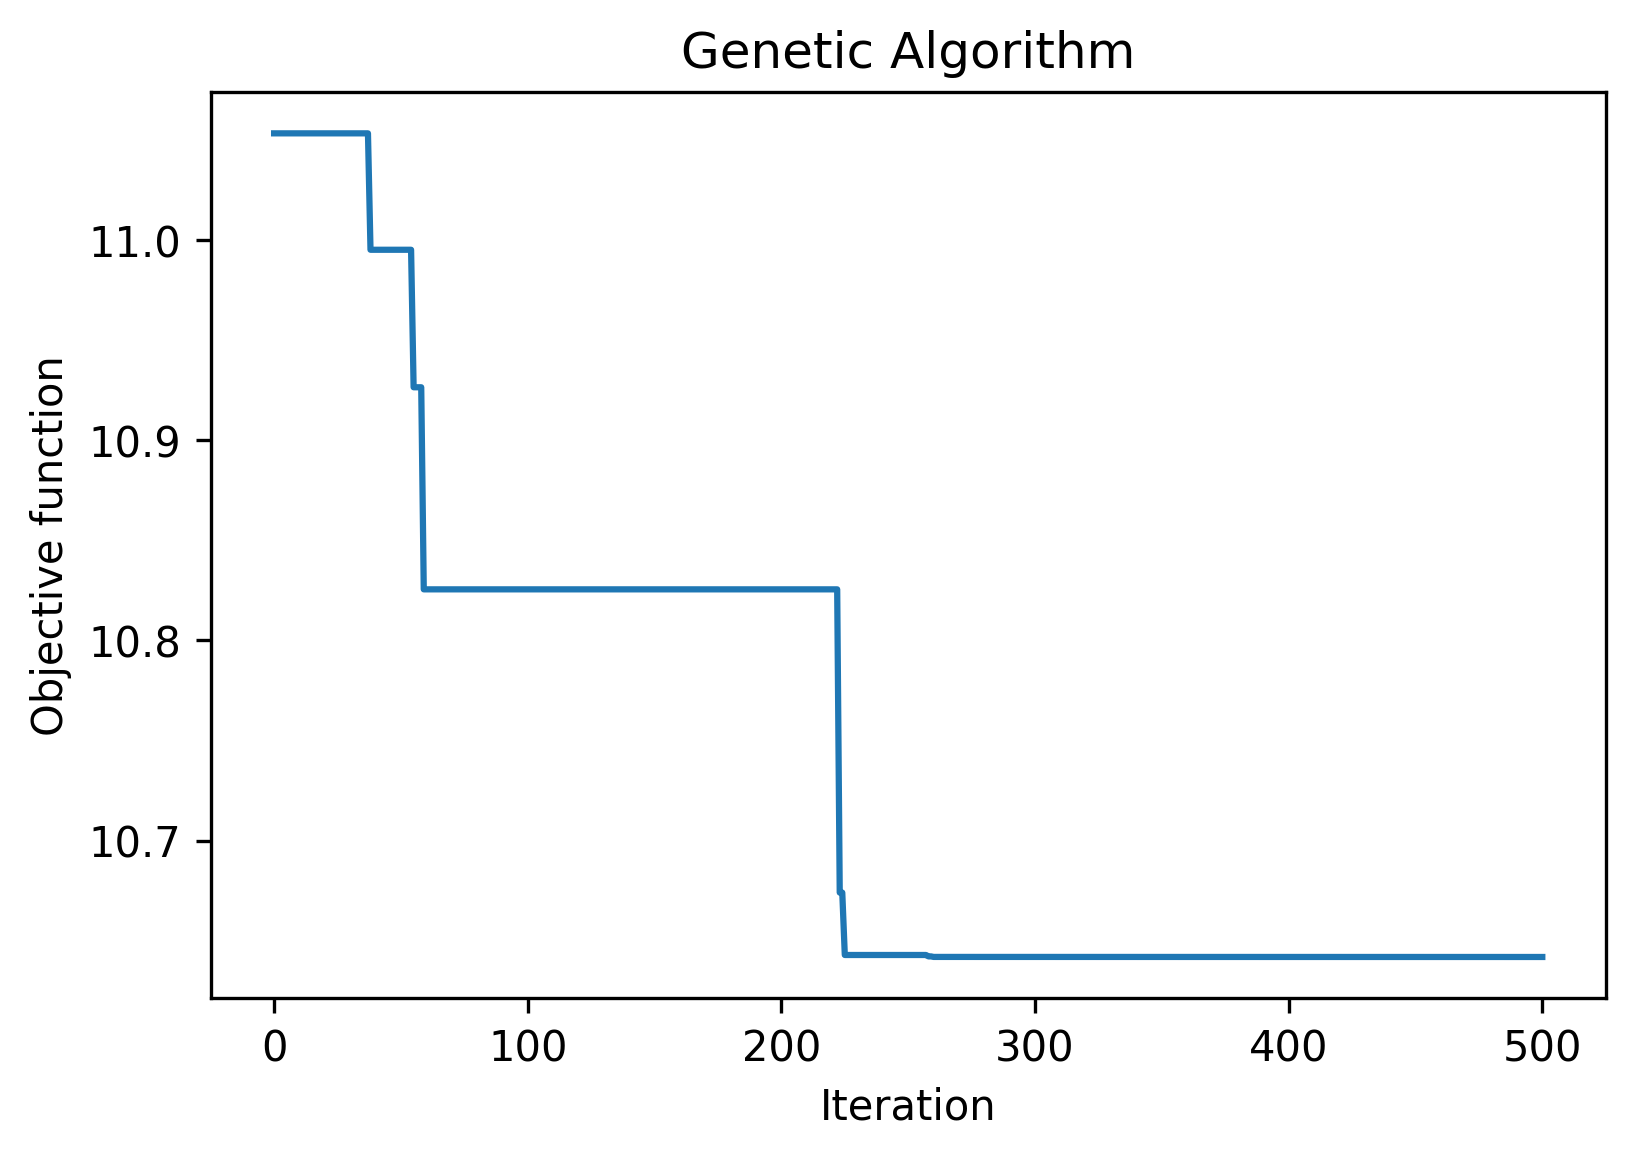

In [ ]:
varbound=np.array([[0,10]])

model=ga(function=objective_Las,dimension=1,variable_type='real',variable_boundaries=varbound)

model.run()

### Simulated Annealing


In [ ]:
lw = [0]
up = [100]
ret_Las = dual_annealing(objective_Las, bounds=list(zip(lw, up)),maxiter=10000,maxfun=10000)

In [ ]:
ret_Las.x

In [ ]:
ret_Las

     fun: 10.618699676541059
 message: ['Maximum number of function call reached during dual annealing']
    nfev: 10008
    nhev: 0
     nit: 1780
    njev: 3222
  status: 0
 success: False
       x: array([4.45449655e-05])

### Partical Swarm Optimization

In [40]:
def objective_pso_Las(h): # h is a two column matrix
  kf = KFold(n_splits=10,shuffle=True,random_state=123)
  scale = StandardScaler()
  output = [] 
  for i in range(h.shape[0]):
    a = h[i,0] # column matrix 
    model = Lasso(alpha= a, fit_intercept = False,max_iter=5000)
    PE = []
    for idxtrain, idxtest in kf.split(X):
      Xtrain = X[idxtrain]
      ytrain = y[idxtrain]
      Xtest = X[idxtest]
      ytest = y[idxtest]

      Xtrain_s = scale.fit_transform(Xtrain)
      Xtest_s = scale.transform(Xtest)
      
      model.fit(Xtrain_s,ytrain)
      PE.append(MSE(ytest,model.predict(Xtest_s)))
    output.append(np.mean(PE))
  return output

In [41]:
max = np.array([100])
min = np.array([0])
bounds = (min, max)
options = {'c1': 0.25, 'c2': 0.25, 'w': 0.5}
optimizer = ps.single.GlobalBestPSO(n_particles=25, dimensions=1, options=options, bounds=bounds)
cost, pos = optimizer.optimize(objective_pso_Las, iters=1000)

2022-07-31 16:22:32,149 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.25, 'c2': 0.25, 'w': 0.5}
pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=11.4
2022-07-31 16:38:59,236 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 11.356139319181818, best pos: [30.41598191]


### Ridge

In [ ]:
def objective_Rid(h): # h is a two column matrix
  kf = KFold(n_splits=10,shuffle=True,random_state=123)
  scale = StandardScaler()
  output = [] 
  a = h # column matrix 
  model = Ridge(alpha= a, fit_intercept = False, max_iter=10000)
  PE = []
  for idxtrain, idxtest in kf.split(X):
    Xtrain = X[idxtrain]
    ytrain = y[idxtrain]
    Xtrain_s = scale.fit_transform(Xtrain)
    Xtest = X[idxtest]
    ytest = y[idxtest]
    Xtest_s = scale.transform(Xtest)
    model.fit(Xtrain_s,ytrain)
    PE.append(MSE(ytest,model.predict(Xtest_s)))
  return np.mean(PE)

### Genetic Algorithm

 The best solution found:
 [0.00028999]

 Objective function:
 10.668241850432889


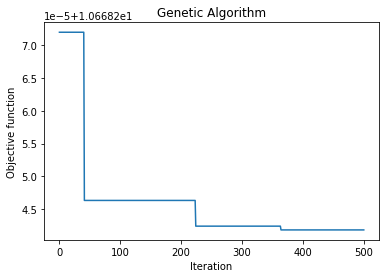

In [ ]:
varbound=np.array([[0,10]])

model=ga(function=objective_Rid,dimension=1,variable_type='real',variable_boundaries=varbound)

model.run()

### Simulated Annealing

In [ ]:
lw = [0]
up = [100]
ret_Rid = dual_annealing(objective_Rid, bounds=list(zip(lw, up)),maxiter=10000,maxfun=10000)

In [ ]:
ret_Rid.x

In [ ]:
ret_Rid

     fun: 10.668241491490525
 message: ['Maximum number of function call reached during dual annealing']
    nfev: 10038
    nhev: 0
     nit: 1800
    njev: 3217
  status: 0
 success: False
       x: array([6.3560625e-06])

### Partical Swarm Optimization

In [ ]:
def objective_pso_Rid(h): # h is a two column matrix
  kf = KFold(n_splits=10,shuffle=True,random_state=123)
  scale = StandardScaler()
  output = [] 
  for i in range(h.shape[0]):
    a = h[i,0] # column matrix 
    model = Ridge(alpha= a, fit_intercept = False,max_iter=5000)
    PE = []
    for idxtrain, idxtest in kf.split(X):
      Xtrain = X[idxtrain]
      ytrain = y[idxtrain]
      Xtest = X[idxtest]
      ytest = y[idxtest]

      Xtrain_s = scale.fit_transform(Xtrain)
      Xtest_s = scale.transform(Xtest)
      
      model.fit(Xtrain_s,ytrain)
      PE.append(MSE(ytest,model.predict(Xtest_s)))
    output.append(np.mean(PE))
  return output

In [ ]:
max = np.array([100])
min = np.array([0])
bounds = (min, max)
options = {'c1': 0.25, 'c2': 0.25, 'w': 0.5}
optimizer = ps.single.GlobalBestPSO(n_particles=25, dimensions=1, options=options, bounds=bounds)
cost, pos = optimizer.optimize(objective_pso_Rid, iters=1000)

2022-07-31 16:03:22,152 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.25, 'c2': 0.25, 'w': 0.5}
pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=10.7
2022-07-31 16:21:22,071 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 10.668241894362643, best pos: [0.0003802]
